In [1]:
import requests
import time
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os

In [2]:
from sqlalchemy import create_engine, inspect

In [3]:
from datetime import timedelta

In [4]:
from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.metrics import roc_curve, auc

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn import pipeline, preprocessing

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from sklearn.model_selection import GridSearchCV

In [196]:
from sklearn.metrics import precision_recall_curve

In [200]:
from sklearn.metrics import average_precision_score

In [204]:
from sklearn.metrics import recall_score

In [13]:
df=pd.read_csv('start-up.csv',index_col=0 )

In [257]:
df.columns

Index(['permalink', 'company_name', 'category_code', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter',
       'founded_year', 'first_funding_at', 'last_funding_at',
       'last_milestone_at', 'days_in_op', 'first_funding_dayinop',
       'last_funding_dayinop', 'sa_funded_at', 'sa_raised_amount_usd',
       'sa_funded_daysop', 'ag_funded_at', 'ag_raised_amount_usd',
       've_funded_at', 've_raised_amount_usd', 'ag_funded_daysop',
       've_funded_daysop', 'CA', 'NY', 'MA', 'TX', 'WA', 'cr_funded_at',
       'cr_raised_amount_usd', 'cr_funded_daysop', 'ave_inf_y', 'adj_base2018',
       'sa_raised_amount_usd_adj', 'ag_raised_amount_usd_adj',
       've_raised_amount_usd_adj', 'cr_raised_amount_usd_adj'],
      dtype='object')

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8048 entries, 0 to 8047
Data columns (total 43 columns):
permalink                   8048 non-null object
company_name                8048 non-null object
category_code               8048 non-null object
funding_total_usd           8048 non-null object
status                      8048 non-null object
country_code                8048 non-null object
state_code                  8048 non-null object
region                      8048 non-null object
city                        8048 non-null object
funding_rounds              8048 non-null int64
founded_at                  8048 non-null object
founded_month               8048 non-null int64
founded_quarter             8048 non-null object
founded_year                8048 non-null int64
first_funding_at            8048 non-null object
last_funding_at             8048 non-null object
last_milestone_at           8048 non-null object
days_in_op                  8048 non-null object
first_funding_

In [15]:
y1,X1=dmatrices('''status ~ category_code  + CA + NY + MA + TX + WA + founded_month 
                + first_funding_dayinop + ave_inf_y 
                + sa_funded_daysop + sa_raised_amount_usd_adj
                + ag_funded_daysop + ag_raised_amount_usd_adj
                + cr_funded_daysop + cr_raised_amount_usd_adj''',data=df,return_type='dataframe')

In [16]:
X1=X1.drop(columns='Intercept')

In [256]:
X1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5482 entries, 0 to 5807
Data columns (total 63 columns):
category_code[T.analytics]                 5482 non-null float64
category_code[T.automotive]                5482 non-null float64
category_code[T.biotech]                   5482 non-null float64
category_code[T.cleantech]                 5482 non-null float64
category_code[T.consulting]                5482 non-null float64
category_code[T.design]                    5482 non-null float64
category_code[T.ecommerce]                 5482 non-null float64
category_code[T.education]                 5482 non-null float64
category_code[T.enterprise]                5482 non-null float64
category_code[T.fashion]                   5482 non-null float64
category_code[T.finance]                   5482 non-null float64
category_code[T.games_video]               5482 non-null float64
category_code[T.hardware]                  5482 non-null float64
category_code[T.health]                    5482 

In [18]:
y1['status[acquired]'].sum()/len(y1)

0.123859905144108

In [19]:
y1_ac=y1['status[acquired]']

In [138]:
##logistc regression and auc estimates

X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2, random_state=42)

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }

log_ac = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
    
log_ac.fit(X1_train,y1_ac_train)
y_score=log_ac.predict_proba(X1_test)[:,1]

fpr1_ac, tpr1_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac = auc(fpr1_ac, tpr1_ac)

y_score1=log_ac.predict_proba(X1_train)[:,1]

fpr1_ac_train, tpr1_ac_train,_ = roc_curve(y1_ac_train, y_score1)
roc_auc1_ac_train = auc(fpr1_ac_train, tpr1_ac_train)

print(roc_auc1_ac,roc_auc1_ac_train)

0.7440885539331136 0.76279016817298


In [22]:
y1['status[ipo]'].sum()/len(y1)

0.02553812477198103

In [23]:
y1_ipo=y1['status[ipo]']

In [89]:
## logistic regression or ipo category
X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2, random_state=42)


tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }

log_ipo = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ipo.fit(X1_train,y1_ipo_train)
y_score=log_ipo.predict_proba(X1_test)[:,1]

fpr1_ipo, tpr1_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc1_ipo = auc(fpr1_ipo, tpr1_ipo)

y_score=log_ipo.predict_proba(X1_train)[:,1]

fpr1_ipo_train, tpr1_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc1_ipo_train = auc(fpr1_ipo_train, tpr1_ipo_train)

print(roc_auc1_ipo,roc_auc1_ipo_train)

0.8842710142990778 0.8573413627093711


In [91]:
## logistic regression with normallized variables and calculating AUC

# log_ac_p=pipeline.Pipeline([
#     ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
#     ( 'log', LogisticRegression())
# ])

norm=preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)

X1_train_n=norm.fit_transform(X1_train)

X1_test_n = norm.transform(X1_test)

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }


log_ac_n=GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ac_n.fit(X1_train_n,y1_ac_train)
y_score=log_ac_n.predict_proba(X1_test_n)[:,1]

fpr1_ac_n, tpr1_ac_n,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac_n = auc(fpr1_ac, tpr1_ac)

y_score=log_ac_n.predict_proba(X1_train_n)[:,1]

fpr1_ac_n_train, tpr1_ac_n_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc1_ac_n_train = auc(fpr1_ac_train, tpr1_ac_train)

print(roc_auc1_ac, roc_auc1_ac_n_train )

0.7429816297691945 0.7624481634153987


In [90]:
## logistic regression with normallized variables and calculating AUC

log_ipo_n=GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ipo_n.fit(X1_train_n,y1_ipo_train)
y_score=log_ipo_n.predict_proba(X1_test_n)[:,1]

fpr1_ipo_n, tpr1_ipo_n,_ = roc_curve(y1_ipo_test, y_score)
roc_auc1_ipo_n = auc(fpr1_ipo_n, tpr1_ipo_n)

y_score=log_ipo_n.predict_proba(X1_train_n)[:,1]

fpr1_ipo_n_train, tpr1_ipo_n_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc1_ipo_n_train = auc(fpr1_ipo_n_train, tpr1_ipo_n_train)

print(roc_auc1_ipo_n, roc_auc1_ipo_n_train)

0.8998730455699586 0.8717800307579151


In [93]:
# random forest model for AC
tuned_parameters= { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,4,5],
    'criterion' :['gini', 'entropy']
}

randomforest_ac =  GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
randomforest_ac.fit(X1_train,y1_ac_train)
y_score=randomforest_ac.predict_proba(X1_test)[:,1]

fpr2_ac, tpr2_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc2_ac = auc(fpr2_ac, tpr2_ac)


y_score=randomforest_ac.predict_proba(X1_train)[:,1]

fpr2_ac_train, tpr2_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc2_ac_train = auc(fpr2_ac_train, tpr2_ac_train)


In [94]:
print(roc_auc2_ac, roc_auc2_ac_train)

0.697197362223269 0.8110056940457829


In [38]:
# random forest model for IPO

tuned_parameters= { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,4,5],
    'criterion' :['gini', 'entropy']
}
randomforest_ipo = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
randomforest_ipo.fit(X1_train,y1_ipo_train)

y_score=randomforest_ipo.predict_proba(X1_test)[:,1]
fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

y_score_train=randomforest_ipo.predict_proba(X1_train)[:,1]
fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    

roc_auc2_ipo, roc_auc2_ipo_train 

(0.8877789656554858, 0.9376514910902343)

In [40]:
# Gradient Boosting Classifier on ipo
learning_rates = np.logspace(-4, -0.5, 30)
max_features= range(1,5)
tuned_parameters = [{'learning_rate': learning_rates, 'max_features':max_features,'n_estimators':[300] }]
n_folds = 3


GBC_ipo=GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)


GBC_ipo.fit(X1_train,y1_ipo_train)

y_score=GBC_ipo.predict_proba(X1_test)[:,1]
fpr3_ipo, tpr3_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc3_ipo = auc(fpr3_ipo, tpr3_ipo)

y_score_train=GBC_ipo.predict_proba(X1_train)[:,1]
fpr3_ipo_train, tpr3_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
roc_auc3_ipo_train = auc(fpr3_ipo_train, tpr3_ipo_train)

 

In [41]:
roc_auc3_ipo, roc_auc3_ipo_train 

(0.8794768141119871, 0.9312721490421584)

In [42]:
# Gradient Boosting Classifier on AC

learning_rates = np.logspace(-4, -0.5, 30)
max_features= range(1,5)
tuned_parameters = [{'learning_rate': learning_rates, 'max_features':max_features,'n_estimators':[300] }]
n_folds = 3


GBC_ac=GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)


GBC_ac.fit(X1_train,y1_ac_train)

y_score=GBC_ac.predict_proba(X1_test)[:,1]
fpr3_ac, tpr3_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc3_ac = auc(fpr3_ac, tpr3_ac)

y_score_train=GBC_ac.predict_proba(X1_train)[:,1]
fpr3_ac_train, tpr3_ac_train,_ = roc_curve(y1_ac_train, y_score_train)
roc_auc3_ac_train = auc(fpr3_ac_train, tpr3_ac_train)

roc_auc3_ac, roc_auc3_ac_train 

(0.7280185272413252, 0.8770245205026612)

In [65]:
#Support vector machine on IPO

tuned_parameters = [
  {'C': [1, 10, 50], 'kernel': ['linear'],'probability':[True]},
  {'C': [1, 10, 50], 'gamma': [0.001, 0.0001,0.01], 'kernel': ['rbf'],'probability':[True]},
 ]


SVC1_ipo=GridSearchCV(SVC(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)

SVC1_ipo.fit(X1_train_n,y1_ipo_train)

y_score=SVC1_ipo.predict_proba(X1_test_n)[:,1]
fpr4_ipo, tpr4_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc4_ipo = auc(fpr4_ipo, tpr4_ipo)

y_score=SVC1_ipo.predict_proba(X1_train_n)[:,1]
fpr4_ipo_train, tpr4_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc4_ipo_train = auc(fpr4_ipo_train, tpr4_ipo_train)

roc_auc4_ipo, roc_auc4_ipo_train

(0.7741547507684085, 0.943657851626492)

In [72]:
#Support vector machine on ac

tuned_parameters = [
  {'C': [1, 10, 50], 'kernel': ['linear'],'probability':[True]},
  {'C': [1, 10, 50], 'gamma': [0.001, 0.0001,0.01], 'kernel': ['rbf'],'probability':[True]},
 ]

SVC1_ac=GridSearchCV(SVC(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)

SVC1_ac.fit(X1_train_n,y1_ac_train)

y_score=SVC1_ac.predict_proba(X1_test_n)[:,1]
fpr4_ac, tpr4_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc4_ac = auc(fpr4_ac, tpr4_ac)

y_score=SVC1_ac.predict_proba(X1_train_n)[:,1]
fpr4_ac_train, tpr4_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc4_ac_train = auc(fpr4_ac_train, tpr4_ac_train)

roc_auc4_ac, roc_auc4_ac_train

(0.620034542314335, 0.8308062452545648)

In [45]:
#Naive-Bayes on IPO, it does not have hyperparameters 
bayes_ipo = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian

bayes_ipo.fit(X1_train,y1_ipo_train)

y_score=bayes_ipo.predict_proba(X1_test)[:,1]
fpr6_ipo, tpr6_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc6_ipo = auc(fpr6_ipo, tpr6_ipo)

y_score=bayes_ipo.predict_proba(X1_train)[:,1]
fpr6_ipo_train, tpr6_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc6_ipo_train = auc(fpr6_ipo_train, tpr6_ipo_train)

roc_auc6_ipo, roc_auc6_ipo_train

(0.7862989442736871, 0.7876157600882618)

In [96]:
#Naive-Bayes on ac, it does not have hyperparameters 
bayes_ac = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian

bayes_ac.fit(X1_train,y1_ac_train)

y_score=bayes_ac.predict_proba(X1_test)[:,1]
fpr6_ac, tpr6_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc6_ac = auc(fpr6_ac, tpr6_ac)

y_score=bayes_ac.predict_proba(X1_train)[:,1]
fpr6_ac_train, tpr6_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc6_ac_train = auc(fpr6_ac_train, tpr6_ac_train)

In [47]:
def cv_Bayes(X1, y1_ipo):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    
    bayes = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian
   
    bayes.fit(X1_train,y1_ipo_train)

    y_score=bayes.predict_proba(X1_test)[:,1]
    fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

    y_score_train=bayes.predict_proba(X1_train)[:,1]
    fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)

    
    return roc_auc2_ipo,roc_auc2_ipo_train,bayes,X1_train,X1_test, y1_ipo_train, y1_ipo_test

In [48]:
def Bayes_afew_times(X1, y1_ipo, n=10):
    info= (pd.DataFrame([cv_Bayes(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc', 'Model', 'X1_train','X1_test','y1_train', 'y1_test']))
    
#         (pd.DataFrame([mod_SVC(X1, y1_ipo) for j in range(n)],
#                          columns=['Test auc','Train auc'])).mean()
                         
                         
    return info

In [67]:
info_b_ipo=Bayes_afew_times(X1, y1_ipo,n=10)

In [50]:
np.mean(info_b_ipo['Train auc'])

0.7834000452122264

In [51]:
np.mean(info_b_ipo['Test auc'])

0.786085998050429

In [68]:
info_b_ac=Bayes_afew_times(X1, y1_ac,n=10)

In [69]:
info_b_ac

,Test auc,Train auc,Model,X1_train,X1_test,y1_train,y1_test
0,0.550227,0.538847,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,4856 0.0 3868 0.0 962 0.0 1342 0....,5760 0.0 5456 0.0 3869 0.0 3161 0....
1,0.554995,0.558803,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,3108 0.0 4024 0.0 4690 0.0 87 0....,4146 0.0 4868 0.0 1256 0.0 2298 1....
2,0.558153,0.554349,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,2100 0.0 4672 0.0 5092 0.0 4294 1....,672 0.0 1235 0.0 2372 1.0 402 0....
3,0.542461,0.563421,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,5722 0.0 1808 1.0 3584 0.0 4224 0....,4357 0.0 2046 1.0 3003 0.0 564 0....
4,0.557191,0.559147,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,4248 0.0 5075 0.0 5565 0.0 4165 1....,4780 0.0 578 0.0 3528 0.0 992 0....
5,0.490330,0.566598,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,2701 1.0 4813 0.0 3025 0.0 3149 0....,5535 0.0 2248 0.0 3922 0.0 915 0....
6,0.533077,0.561490,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,2184 0.0 3470 0.0 2834 0.0 924 0....,4150 0.0 5524 1.0 5565 0.0 230 0....
7,0.549344,0.556901,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,2660 0.0 818 0.0 3067 1.0 5382 0....,2960 0.0 2301 0.0 1390 0.0 2459 0....
8,0.541190,0.551175,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,1491 0.0 2229 1.0 3932 0.0 2035 0....,3030 0.0 1117 1.0 631 0.0 4466 0....
9,0.495439,0.540557,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,1464 0.0 569 0.0 2028 0.0 2069 0....,1925 0.0 3252 0.0 3943 0.0 1314 0....


In [54]:
np.mean(info_b_ac['Train auc'])

0.5553698406535466

In [55]:
np.mean(info_b_ac['Test auc'])

0.5500524284552709

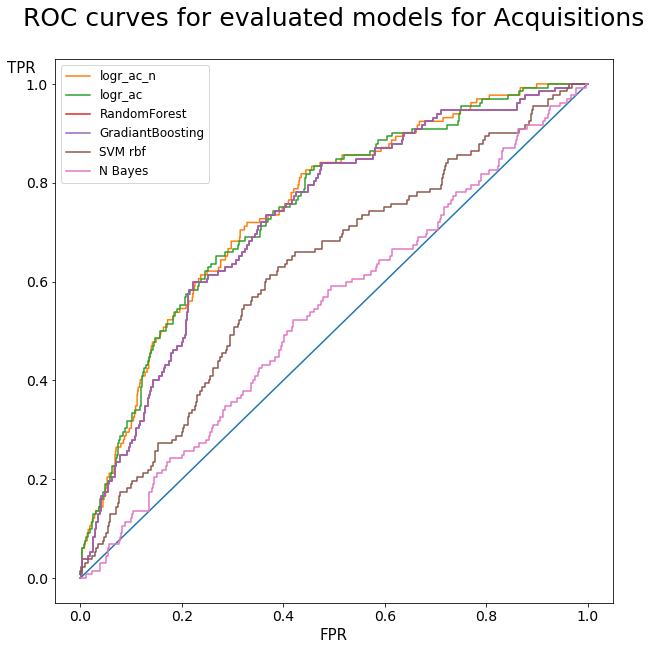

In [73]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ac_n,tpr1_ac_n,label='logr_ac_n')
plt.plot(fpr1_ac,tpr1_ac,label='logr_ac')
plt.plot(fpr3_ac,tpr3_ac,label='RandomForest')
plt.plot(fpr3_ac,tpr3_ac,label='GradiantBoosting')
plt.plot(fpr4_ac,tpr4_ac,label='SVM rbf')
plt.plot(fpr6_ac,tpr6_ac,label='N Bayes')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for Acquisitions", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);


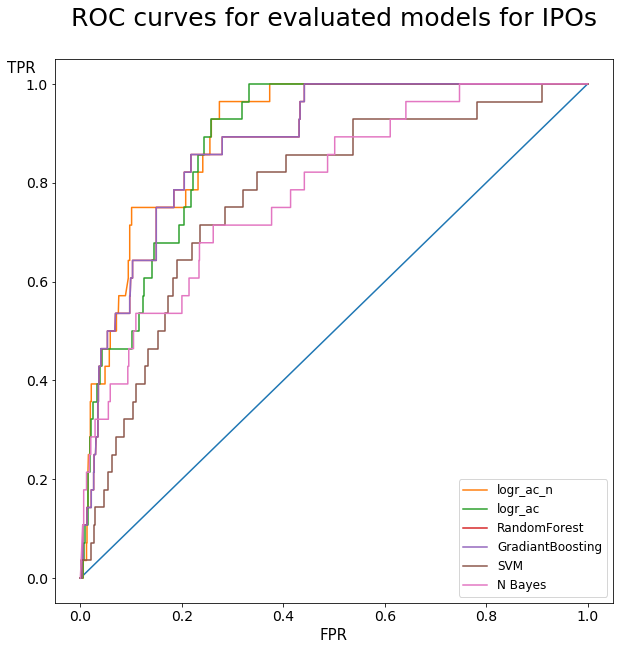

In [74]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ipo_n,tpr1_ipo_n,label='logr_ac_n')
plt.plot(fpr1_ipo,tpr1_ipo,label='logr_ac')
plt.plot(fpr3_ipo,tpr3_ipo,label='RandomForest')
plt.plot(fpr3_ipo,tpr3_ipo,label='GradiantBoosting')
plt.plot(fpr4_ipo,tpr4_ipo,label='SVM')
plt.plot(fpr6_ipo,tpr6_ipo,label='N Bayes')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for IPOs", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);

In [75]:
Name=['logr', 'logr_n','RandomForest', 'GradiantBoosting','SVM','N Bayes']

In [117]:
Model_ac=[log_ac,log_ac_n,randomforest_ac,GBC_ac,SVC1_ac,bayes_ac]

In [139]:
Model_ipo=[log_ipo,log_ipo_n,randomforest_ipo,GBC_ipo,SVC1_ipo,bayes_ipo]

In [140]:
auc_test_ac=[roc_auc1_ac,roc_auc1_ac_n, roc_auc2_ac,roc_auc3_ac,roc_auc4_ac, roc_auc6_ac]

In [141]:
auc_train_ac=[roc_auc1_ac_train, roc_auc1_ac_n_train, roc_auc2_ac_train,roc_auc3_ac_train,roc_auc4_ac_train, roc_auc6_ac_train]

In [142]:
auc_test_ipo=[roc_auc1_ipo,roc_auc1_ipo_n, roc_auc2_ipo,roc_auc3_ipo,roc_auc4_ipo, roc_auc6_ipo]

In [143]:
auc_train_ipo=[roc_auc1_ipo_train,roc_auc1_ipo_n_train, roc_auc2_ipo_train,roc_auc3_ipo_train,roc_auc4_ipo_train, roc_auc6_ipo_train]

In [144]:
fpr_ipo =[fpr1_ipo,fpr1_ipo_n,fpr2_ipo,fpr3_ipo,fpr4_ipo,fpr6_ipo]

In [145]:
fpr_ac =[fpr1_ac,fpr1_ac_n,fpr2_ac,fpr3_ac,fpr4_ac,fpr6_ac]

In [146]:
tpr_ac =[tpr1_ac,tpr1_ac_n,tpr2_ac,tpr3_ac,tpr4_ac,tpr6_ac]

In [147]:
tpr_ipo =[tpr1_ipo,tpr1_ipo_n,tpr2_ipo,tpr3_ipo,tpr4_ipo,tpr6_ipo]

In [148]:
fpr_ipo_train =[fpr1_ipo_train,fpr1_ipo_n_train,fpr2_ipo_train,fpr3_ipo_train,fpr4_ipo_train,fpr6_ipo_train]

In [149]:
fpr_ac_train =[fpr1_ac_train,fpr1_ac_n_train,fpr2_ac_train,fpr3_ac_train,fpr4_ac_train,fpr6_ac_train]

In [150]:
tpr_ipo_train =[tpr1_ipo_train,tpr1_ipo_n_train,tpr2_ipo_train,tpr3_ipo_train,tpr4_ipo_train,tpr6_ipo_train]

In [151]:
tpr_ac_train =[tpr1_ac_train,tpr1_ac_n_train,tpr2_ac_train,tpr3_ac_train,tpr4_ac_train,tpr6_ac_train]

In [176]:
Model_data_ac=pd.DataFrame({'name':Name, 'model':Model_ac,'auc_test_ac':auc_test_ac,
                            'auc_train_ac':auc_train_ac })

In [177]:
Model_data_ipo=pd.DataFrame({'name':Name, 'model':Model_ipo,'auc_test_ipo':auc_test_ipo,
                            'auc_train_ipo':auc_train_ipo})

In [178]:
Model_data_ac

,name,model,auc_test_ac,auc_train_ac
0,logr,"GridSearchCV(cv=3, error_score='raise',\n ...",0.744089,0.762790
1,logr_n,"GridSearchCV(cv=3, error_score='raise',\n ...",0.742982,0.762448
2,RandomForest,"GridSearchCV(cv=3, error_score='raise',\n ...",0.697197,0.811006
3,GradiantBoosting,"GridSearchCV(cv=3, error_score='raise',\n ...",0.728019,0.877025
4,SVM,"GridSearchCV(cv=3, error_score='raise',\n ...",0.620035,0.830806
5,N Bayes,GaussianNB(priors=None),0.537125,0.559915


In [179]:
Model_data_ipo

,name,model,auc_test_ipo,auc_train_ipo
0,logr,"GridSearchCV(cv=3, error_score='raise',\n ...",0.884271,0.857341
1,logr_n,"GridSearchCV(cv=3, error_score='raise',\n ...",0.899873,0.871780
2,RandomForest,"GridSearchCV(cv=3, error_score='raise',\n ...",0.887779,0.937651
3,GradiantBoosting,"GridSearchCV(cv=3, error_score='raise',\n ...",0.879477,0.931272
4,SVM,"GridSearchCV(cv=3, error_score='raise',\n ...",0.774155,0.943658
5,N Bayes,GaussianNB(priors=None),0.786299,0.787616


In [186]:
log_ac_n.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.00558829, 0.01055471, 0.00678198, 0.01672236, 0.02362601,
        0.02280656, 0.0352513 , 0.03362234, 0.03964814, 0.05201761,
        0.2033627 , 0.05822476, 1.6796507 , 0.06620288]),
 'std_fit_time': array([5.12674275e-04, 8.92269364e-04, 2.22663070e-04, 2.74444759e-03,
        1.61161978e-03, 1.33256781e-03, 4.24342080e-03, 4.74648030e-03,
        3.10558543e-03, 9.93963538e-03, 2.69115153e-02, 6.40230792e-03,
        6.36538766e-01, 8.78956199e-03]),
 'mean_score_time': array([0.00099365, 0.00116428, 0.00113368, 0.00153462, 0.00133785,
        0.00128309, 0.001261  , 0.00129763, 0.00134865, 0.00129906,
        0.00127006, 0.00128237, 0.00141501, 0.00134397]),
 'std_score_time': array([7.54531921e-06, 1.51245016e-05, 5.60687643e-05, 2.37814960e-04,
        2.92328359e-05, 1.17936224e-05, 1.94988892e-05, 3.33975178e-06,
        5.24037794e-05, 3.44035797e-06, 1.41613411e-05, 4.13990290e-05,
        1.79141486e-04, 3.29690742e-05]),
 'param_C': masked_array(d

In [188]:
GBC_ac.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.25533096, 0.28301096, 0.3082966 , 0.33963641, 0.26568874,
        0.2798841 , 0.31480002, 0.33036788, 0.25352732, 0.28409799,
        0.30398663, 0.32412434, 0.25263532, 0.26946298, 0.29920244,
        0.32034071, 0.25049591, 0.27733095, 0.30264433, 0.32305566,
        0.25266075, 0.27504341, 0.31723539, 0.3408583 , 0.25095812,
        0.27761825, 0.30114738, 0.32286   , 0.25159264, 0.27475595,
        0.30168136, 0.32455436, 0.2516346 , 0.28385385, 0.30412324,
        0.32288067, 0.25391777, 0.27870806, 0.30409265, 0.3282543 ,
        0.26031224, 0.2766873 , 0.31221302, 0.35405064, 0.27152864,
        0.29536374, 0.31840793, 0.33582123, 0.26895181, 0.29156669,
        0.31044277, 0.33239627, 0.26377463, 0.2849257 , 0.31334225,
        0.32528361, 0.26363627, 0.29298441, 0.31986316, 0.33685406,
        0.27028672, 0.27993894, 0.31074524, 0.32337451, 0.26002693,
        0.27863359, 0.30979164, 0.32223479, 0.25989731, 0.281051  ,
        0.3131671 , 0.33321341,

In [187]:
log_ipo_n.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.00619062, 0.00945171, 0.00715669, 0.01618965, 0.01676289,
        0.02336041, 0.04801265, 0.03803531, 0.06479661, 0.05753644,
        0.18851821, 0.08131234, 1.29280106, 0.09164651]),
 'std_fit_time': array([0.00094485, 0.0007802 , 0.00062472, 0.00093862, 0.00179387,
        0.00062606, 0.00727104, 0.00572212, 0.0111329 , 0.00551892,
        0.0450137 , 0.00404629, 0.36142247, 0.0097292 ]),
 'mean_score_time': array([0.00103871, 0.00111628, 0.0010759 , 0.00124272, 0.00117755,
        0.00129175, 0.001254  , 0.00122595, 0.00163436, 0.00139395,
        0.00146874, 0.00136034, 0.00140071, 0.00125917]),
 'std_score_time': array([1.07911619e-04, 2.82771538e-05, 6.99484879e-05, 5.34512737e-05,
        6.94590975e-05, 7.26382807e-05, 5.22466209e-05, 9.33391736e-06,
        3.26567200e-04, 1.40173139e-04, 1.36300426e-04, 2.42534189e-05,
        1.93408565e-04, 3.36648009e-05]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
    

In [210]:
recall_score_ac_n=[]
precision_score_ac_n=[]

for i in np.linspace(0,1,100):
    y_score=log_ac_n.predict_proba(X1_test_n)[:,1]>i
#     sklearn.metrics.recall_score(y1_ac_test, y_pred)#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    
    precision_score_ac_n.append(metrics.precision_score(y1_ac_test, y_score))#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    recall_score_ac_n.append(metrics.recall_score(y1_ac_test, y_score))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarnin

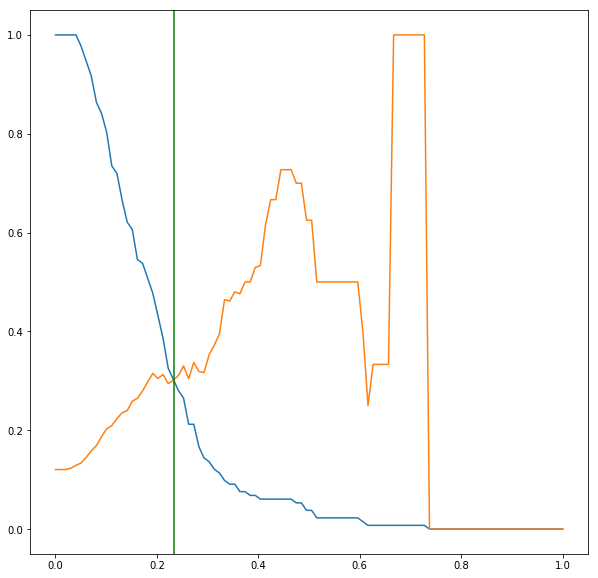

In [219]:
plt.figure(figsize= [10,10])
x=np.linspace(0,1,100)
y=recall_score_ac_n
y2=precision_score_ac_n
plt.plot(x,y)
plt.plot(x,y2)
plt.axvline(0.234, color='g', linestyle='solid');

In [221]:
y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >0.234
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ac_logn=confusion_matrix(y1_ac_test, y_ac_predlogn)
cm_ac_logn

array([[873,  92],
       [ 93,  39]])

In [231]:
print(classification_report(y1_ac_test, y_ac_predlogn))

             precision    recall  f1-score   support

        0.0       0.90      0.90      0.90       965
        1.0       0.30      0.30      0.30       132

avg / total       0.83      0.83      0.83      1097



In [223]:
recall_score_ipo_n=[]
precision_score_ipo_n=[]

for i in np.linspace(0,1,100):
    y_score=log_ipo_n.predict_proba(X1_test_n)[:,1]>i
#     sklearn.metrics.recall_score(y1_ac_test, y_pred)#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    
    precision_score_ipo_n.append(metrics.precision_score(y1_ipo_test, y_score))#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    recall_score_ipo_n.append(metrics.recall_score(y1_ipo_test, y_score))



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarnin

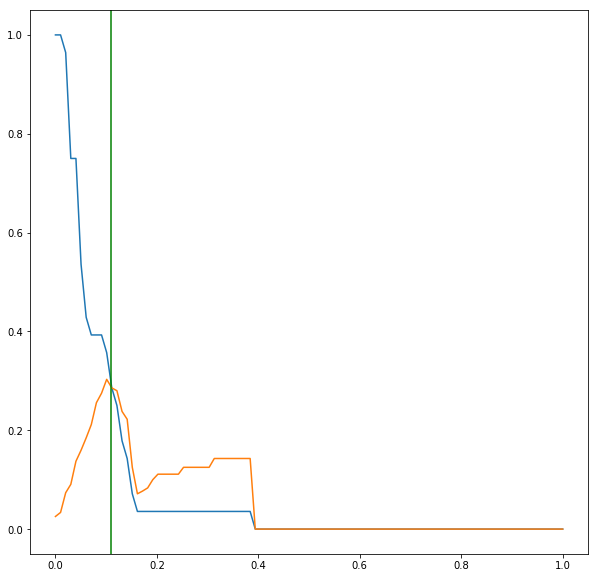

In [229]:
plt.figure(figsize= [10,10])
x=np.linspace(0,1,100)
y=recall_score_ipo_n
y2=precision_score_ipo_n
plt.plot(x,y)
plt.plot(x,y2)
plt.axvline(0.11, color='g', linestyle='solid');

In [235]:
y_ipo_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >0.11
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ipo_logn=confusion_matrix(y1_ipo_test, y_ipo_predlogn)
cm_ipo_logn

array([[615, 454],
       [ 10,  18]])

In [236]:
print(classification_report(y1_ipo_test, y_ipo_predlogn))

             precision    recall  f1-score   support

        0.0       0.98      0.58      0.73      1069
        1.0       0.04      0.64      0.07        28

avg / total       0.96      0.58      0.71      1097



In [237]:
y_ipo_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >0.5
print(classification_report(y1_ipo_test, y_ipo_predlogn))

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      1069
        1.0       0.25      0.07      0.11        28

avg / total       0.96      0.97      0.96      1097



In [238]:
cm_ipo_logn=confusion_matrix(y1_ipo_test, y_ipo_predlogn)
cm_ipo_logn

array([[1063,    6],
       [  26,    2]])

In [250]:


len(log_ac_n.best_estimator_.coef_[0])

63

In [251]:
len(X1.columns)

63

In [252]:
names = X1.columns
coefs = log_ac_n.best_estimator_.coef_[0]

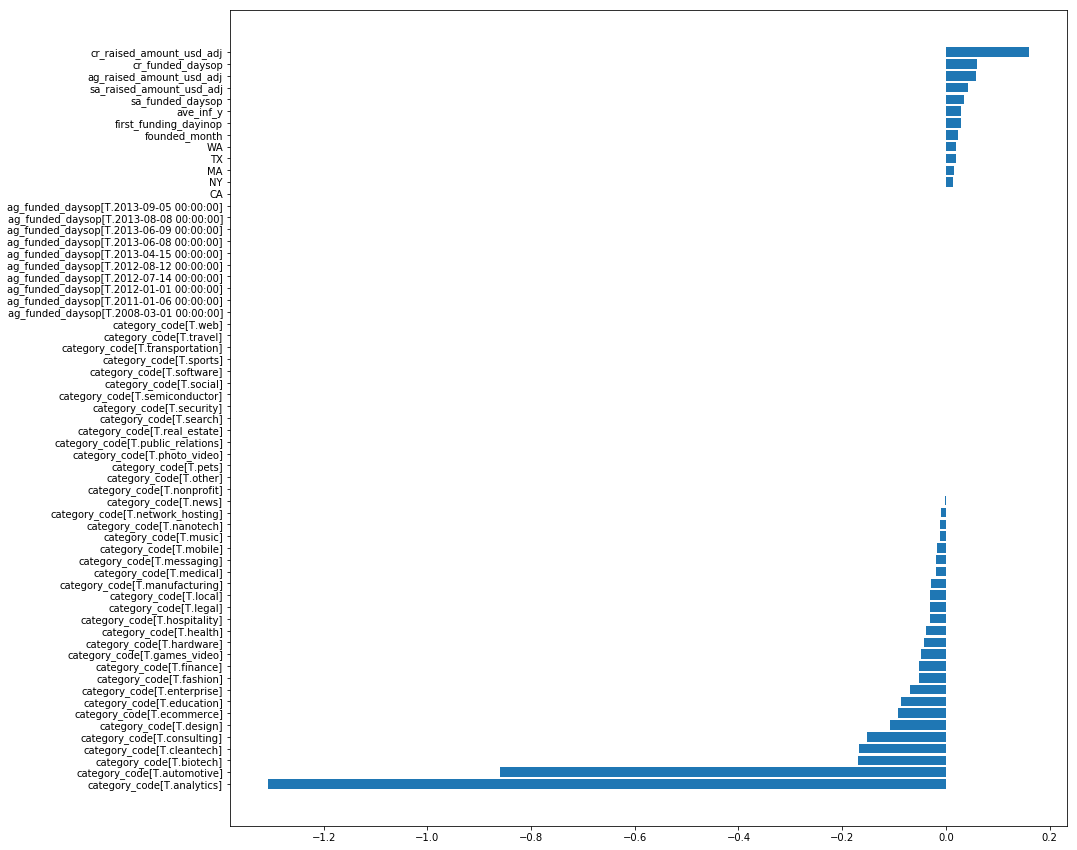

In [255]:
plt.figure(figsize= [15,15])
crange = np.arange(len(names))
# # print(crange.shape, coefs.shape)
plt.barh(crange, sorted(coefs))
plt.yticks(crange, names);